In [51]:
import xarray
import arviz as az
i = 7
bn = 'viet_7'
az.rcParams['data.load'] = 'eager'
idata: az.InferenceData = az.from_netcdf(f'{bn}.nc')

idata.posterior['A'].isel(harmonic=0).median(dim=['chain', 'draw']).plot()
# load xarray from netcdf

y = xarray.open_dataarray(f'y_{bn}.nc')
X = xarray.open_dataarray(f'X_{bn}.nc')

OSError: Can't synchronously read data (wrong B-tree signature)

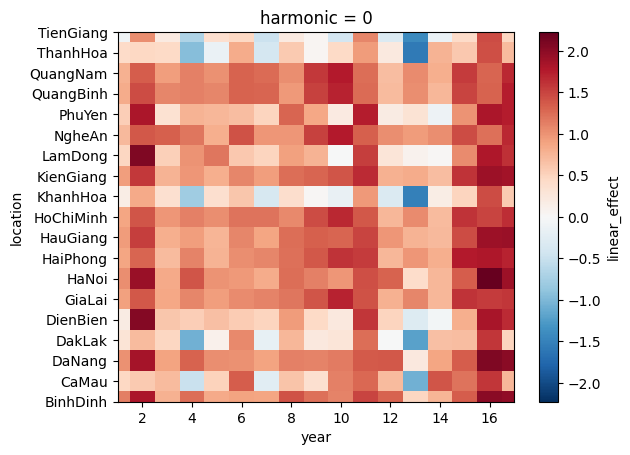

In [28]:
idata.posterior['linear_effect'].isel(harmonic=0).median(dim=['chain', 'draw']).plot()

array([[<Axes: title={'center': 'a_mu\nBinhDinh'}>,
        <Axes: title={'center': 'a_mu\nCaMau'}>,
        <Axes: title={'center': 'a_mu\nDaNang'}>,
        <Axes: title={'center': 'a_mu\nDakLak'}>],
       [<Axes: title={'center': 'a_mu\nDienBien'}>,
        <Axes: title={'center': 'a_mu\nGiaLai'}>,
        <Axes: title={'center': 'a_mu\nHaNoi'}>,
        <Axes: title={'center': 'a_mu\nHaiPhong'}>],
       [<Axes: title={'center': 'a_mu\nHauGiang'}>,
        <Axes: title={'center': 'a_mu\nHoChiMinh'}>,
        <Axes: title={'center': 'a_mu\nKhanhHoa'}>,
        <Axes: title={'center': 'a_mu\nKienGiang'}>],
       [<Axes: title={'center': 'a_mu\nLamDong'}>,
        <Axes: title={'center': 'a_mu\nNgheAn'}>,
        <Axes: title={'center': 'a_mu\nPhuYen'}>,
        <Axes: title={'center': 'a_mu\nQuangBinh'}>],
       [<Axes: title={'center': 'a_mu\nQuangNam'}>,
        <Axes: title={'center': 'a_mu\nThanhHoa'}>,
        <Axes: title={'center': 'a_mu\nTienGiang'}>, <Axes: >]],
      dty

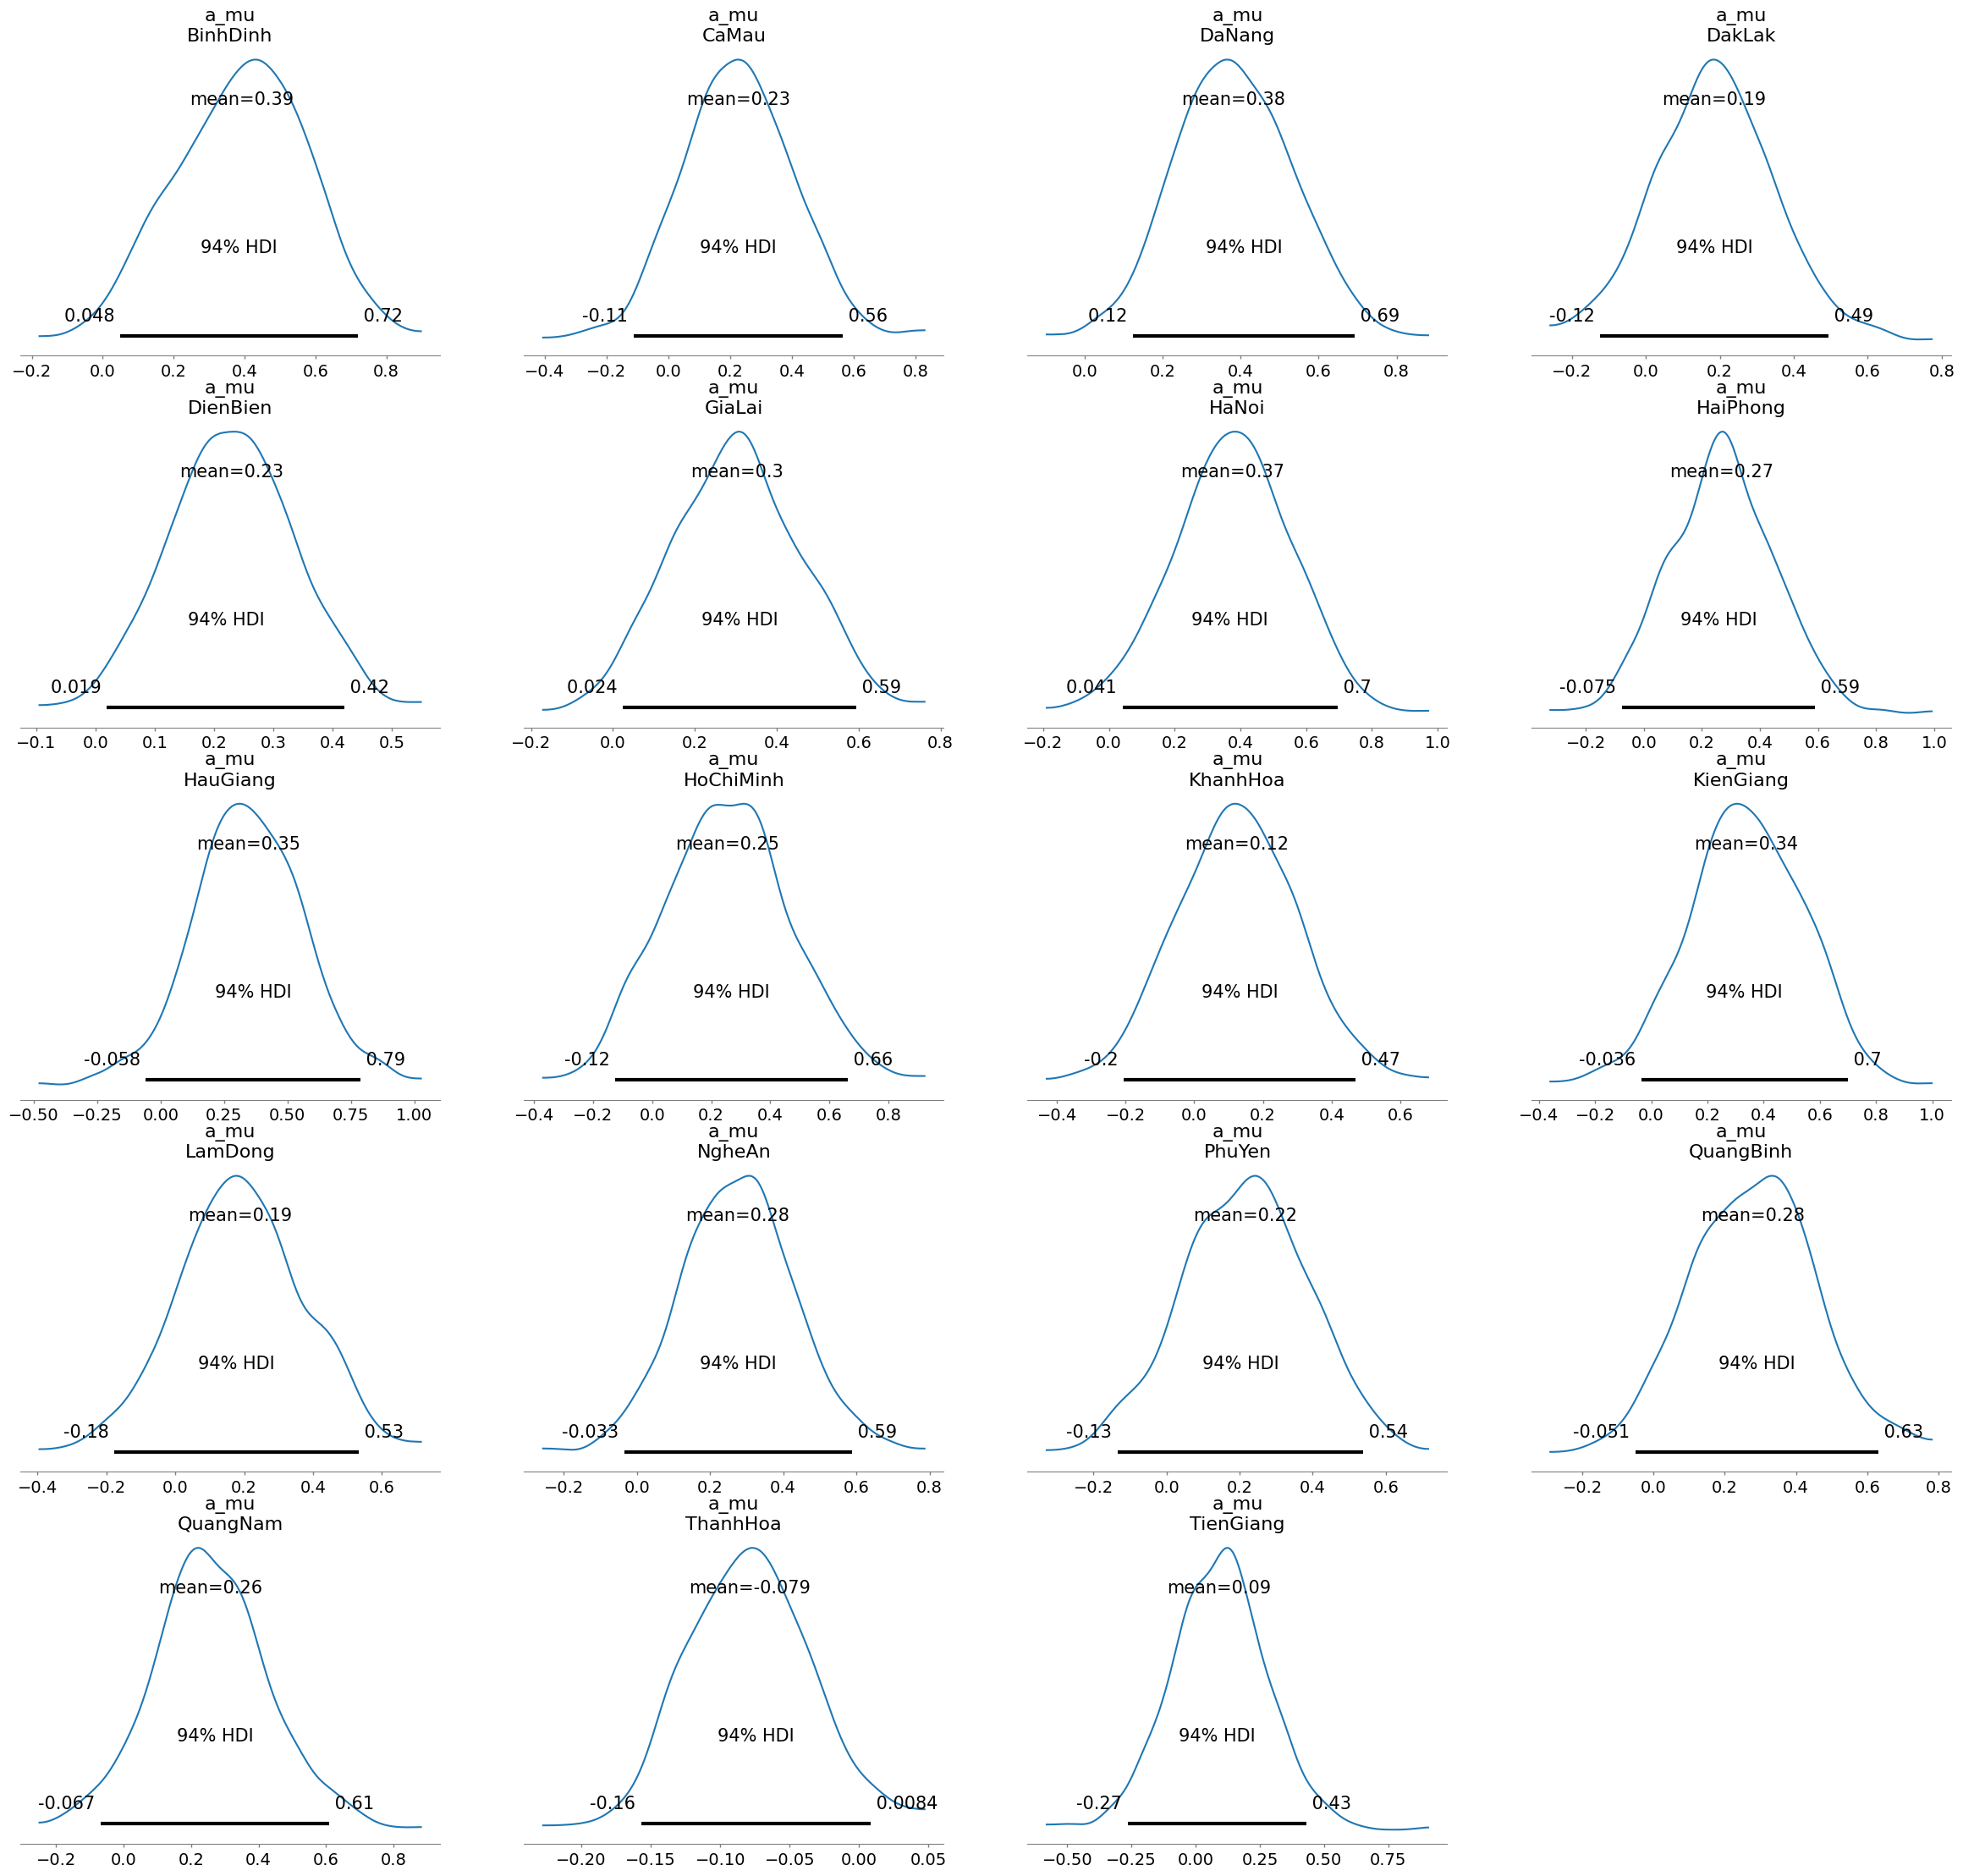

In [38]:
az.plot_posterior(data=idata, var_names=['a_mu'], coords={'harmonic': 0})

<xarray.DataArray 'A' (location: 19)> Size: 152B
array([ 0.34245803,  0.21685337,  0.36734748,  0.16715196,  0.17932191,
        0.25375485,  0.35627213,  0.22241673,  0.27735034,  0.20207273,
        0.13541707,  0.26901318,  0.13406447,  0.23247487,  0.1760409 ,
        0.23521817,  0.23506939, -0.0650791 ,  0.09107165])
Coordinates:
    harmonic  int64 8B 0
  * location  (location) <U9 684B 'BinhDinh' 'CaMau' ... 'ThanhHoa' 'TienGiang'
    year      int64 8B 17


(array([  4.,  21.,  82., 129., 178., 232., 191., 114.,  41.,   8.]),
 array([-0.17973984, -0.07189353,  0.03595277,  0.14379907,  0.25164537,
         0.35949167,  0.46733798,  0.57518428,  0.68303058,  0.79087688,
         0.89872318]),
 <BarContainer object of 10 artists>)

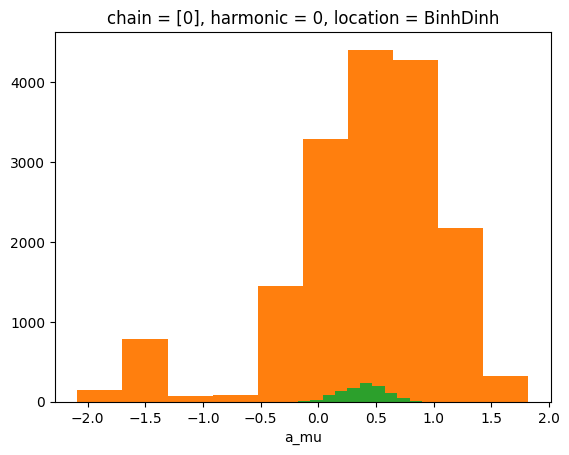

In [42]:
# Plot posterior  A over last year
print(idata.posterior['A'].sel(harmonic=0, year=17).median(dim=['chain', 'draw']))

#az.plot_posterior(data=idata, var_names=['A'], coords={'harmonic': 0, 'year': 17}, point_estimate='median')

import matplotlib.pyplot as plt
idata.posterior['A'].sel(harmonic=0, year=17, location='BinhDinh').plot.hist()
idata.posterior['a_mu'].sel(harmonic=0, location='BinhDinh').plot.hist()

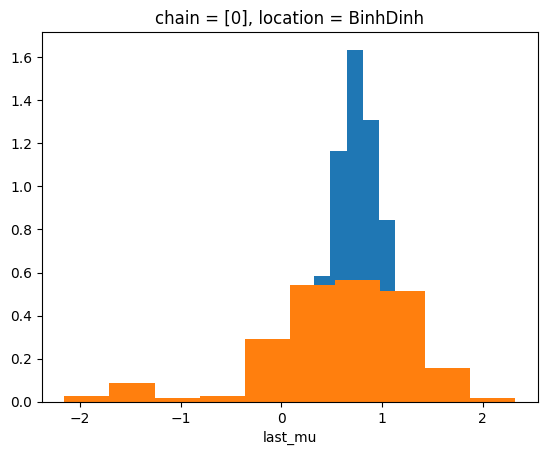

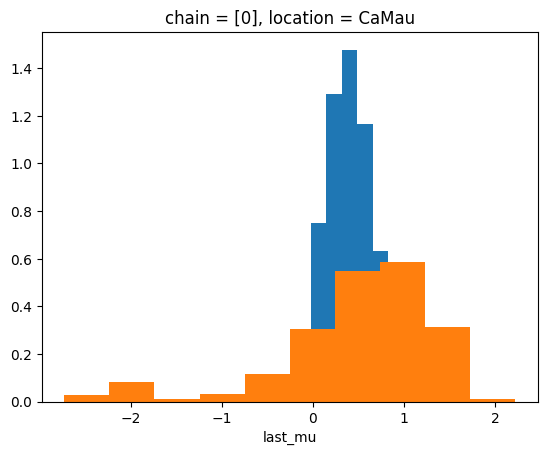

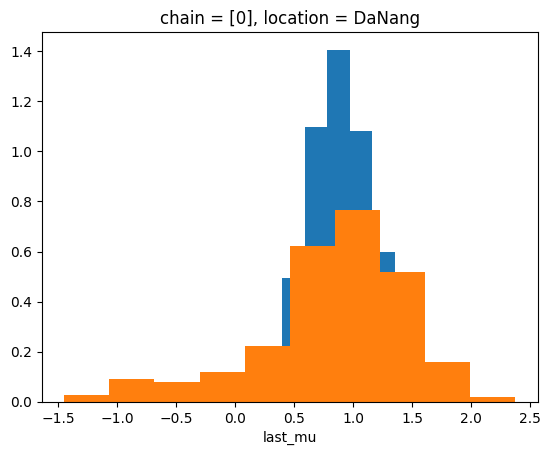

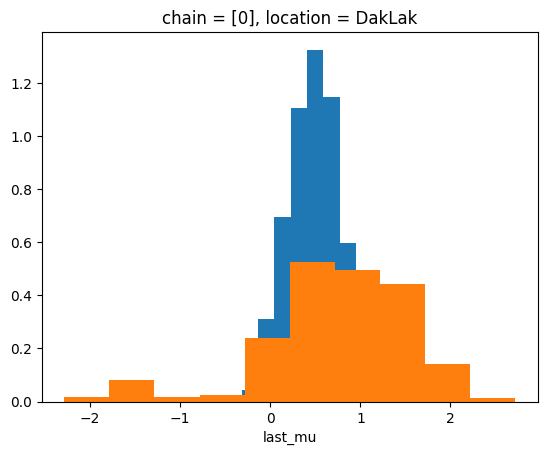

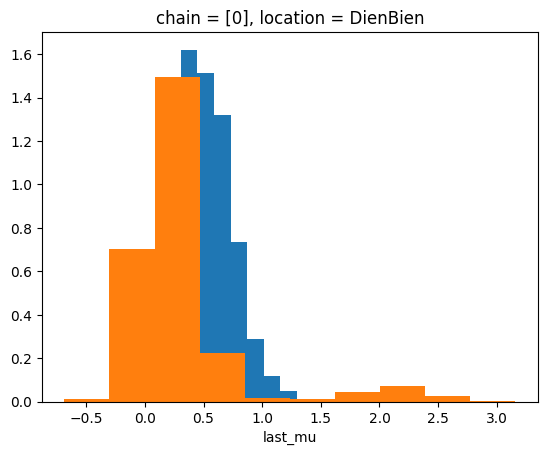

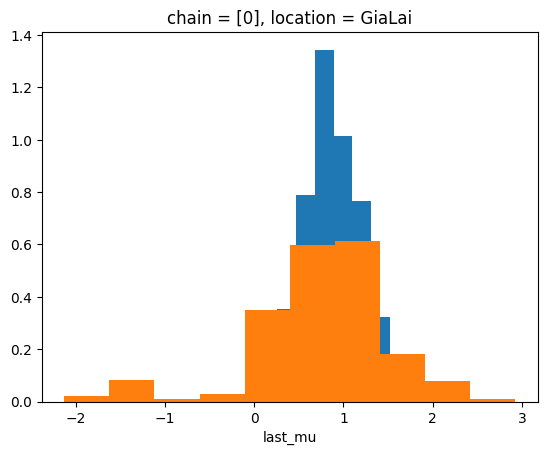

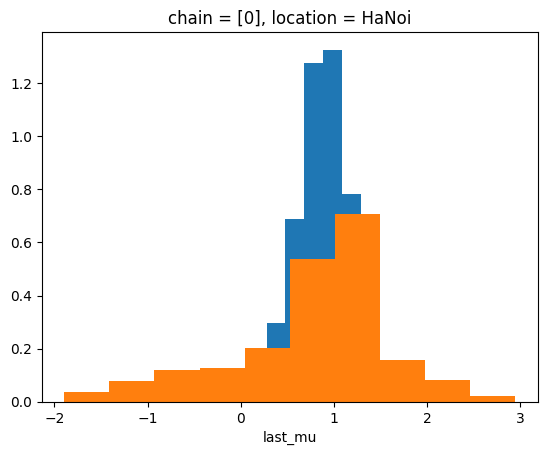

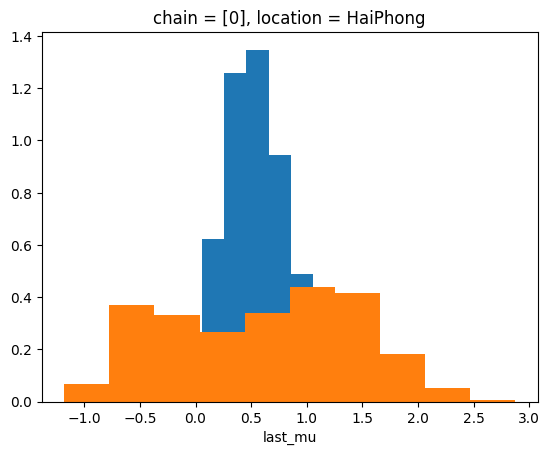

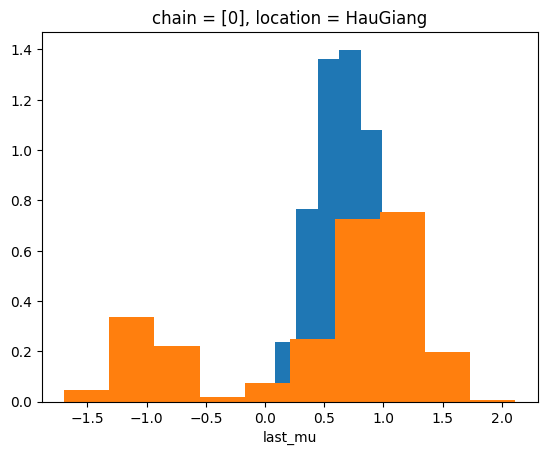

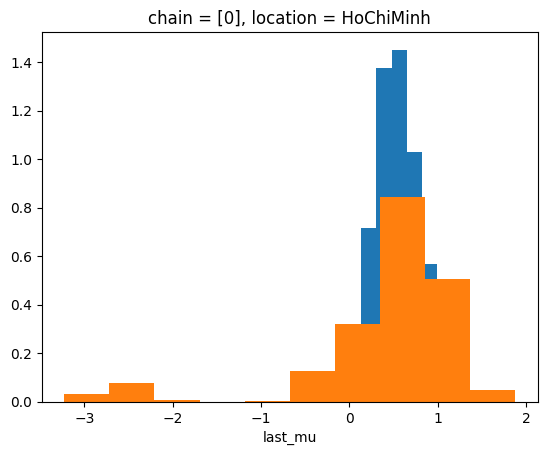

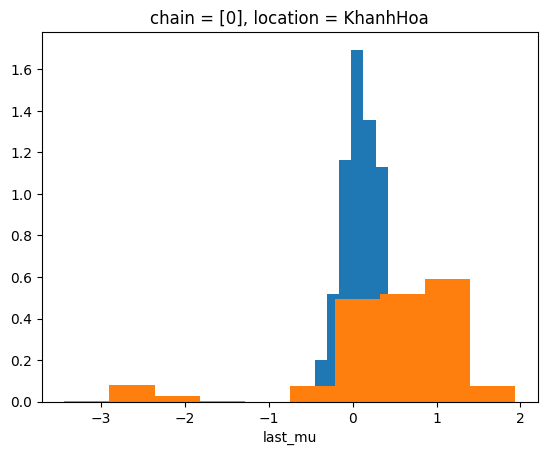

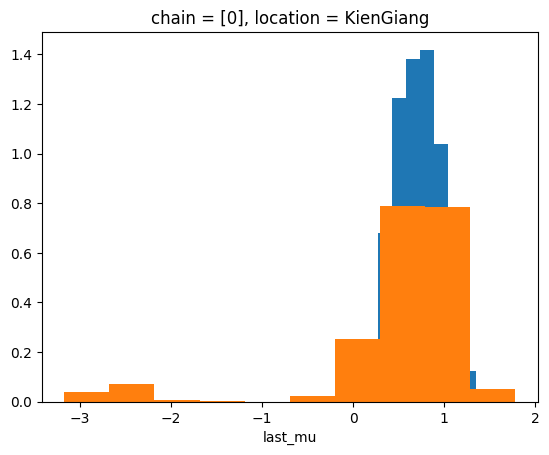

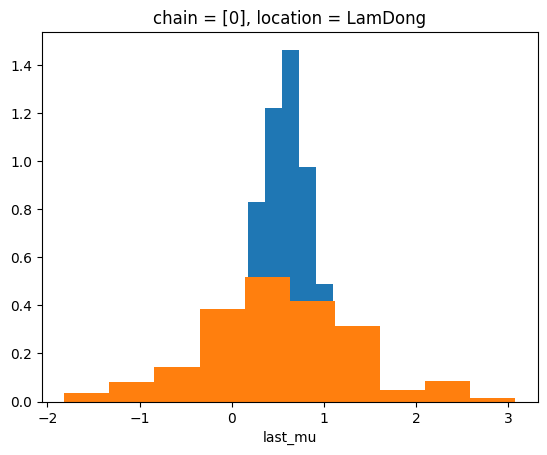

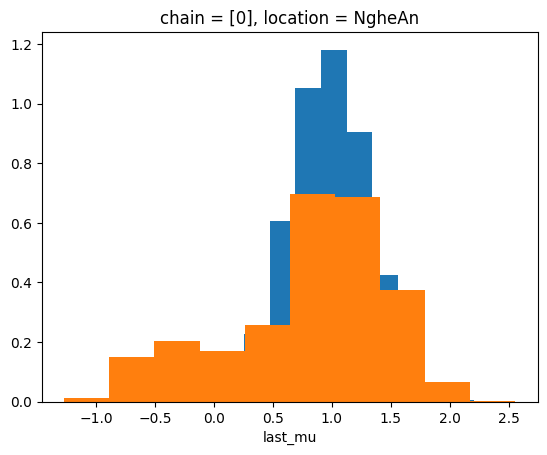

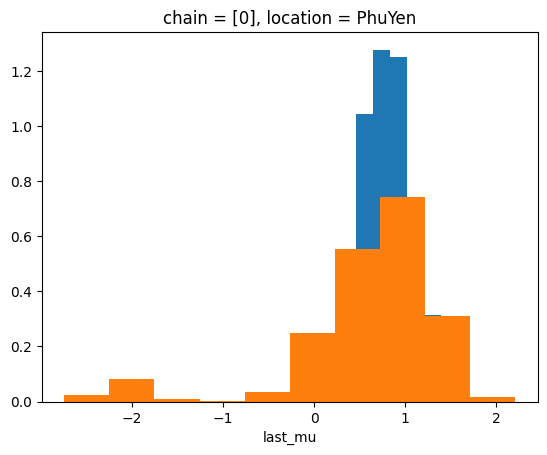

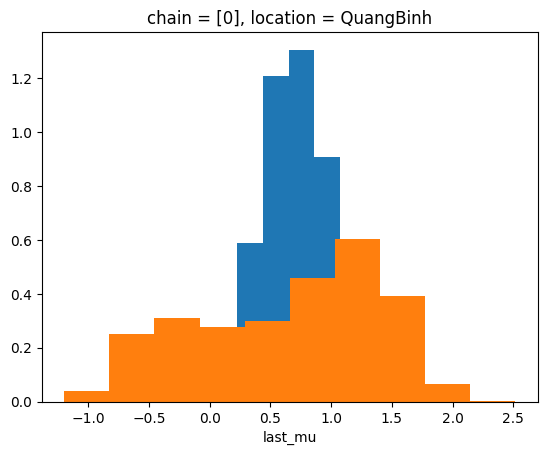

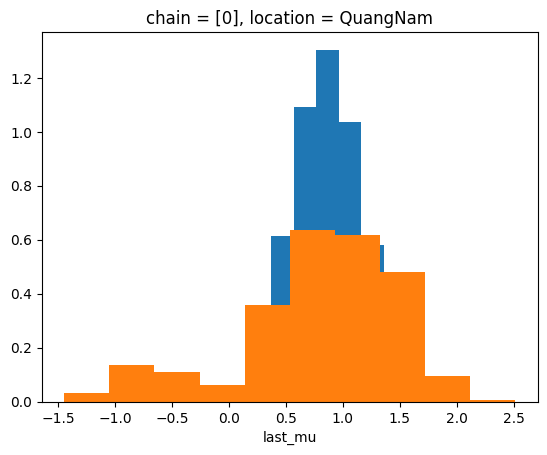

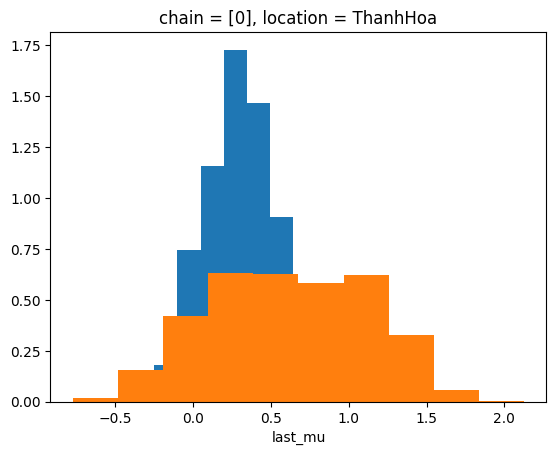

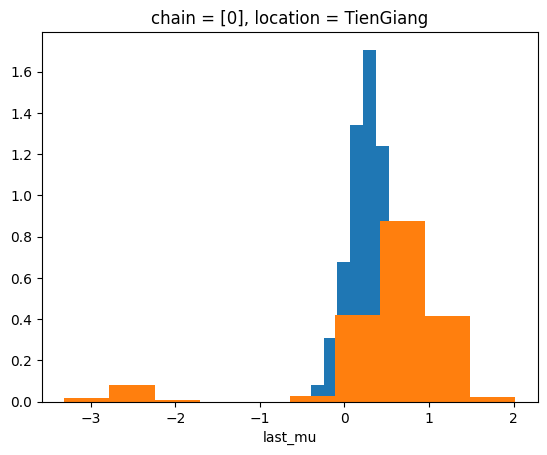

In [49]:
coords = y.coords
max_month = idata.posterior['last_mu'].max(dim=('month'))
for location in coords['location']:
    max_month.sel(location=location, year=17).plot.hist(density=True)
    max_month.sel(location=location).plot.hist(density=True)
    plt.show()

In [31]:
print(y.sel(year=17).values)


[[nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]]


In [32]:
import numpy as np
import pymc as pm
from chap_pymc.curve_parametrizations.fourier_parametrization import FourierParametrization

harmonic_ = np.arange(idata.posterior.dims['harmonic'])
print(harmonic_)
# Convert xarray coords to dict with values
coords = {k: v.values for k, v in y.coords.items()} | {k: v.values for k, v in X.coords.items()} | {'harmonic': harmonic_}
print(coords)
with pm.Model(coords=coords) as model:
    FourierParametrization().get_regression_model(X, y)

    new_a_samples = pm.sample_posterior_predictive(idata, var_names=['y_obs', 'A'], random_seed=42)


[0 1 2 3]
{'location': array(['BinhDinh', 'CaMau', 'DaNang', 'DakLak', 'DienBien', 'GiaLai',
       'HaNoi', 'HaiPhong', 'HauGiang', 'HoChiMinh', 'KhanhHoa',
       'KienGiang', 'LamDong', 'NgheAn', 'PhuYen', 'QuangBinh',
       'QuangNam', 'ThanhHoa', 'TienGiang'], dtype='<U9'), 'year': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]), 'month': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), 'month_name': array(['Sep', 'Oct', 'Nov'], dtype='<U3'), 'feature': array([7, 8, 9]), 'harmonic': array([0, 1, 2, 3])}


/var/folders/27/6m4r1s656rl_kk_v04s_bphc0000gp/T/ipykernel_87373/4236104226.py:5: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  harmonic_ = np.arange(idata.posterior.dims['harmonic'])
Sampling: [A, y_obs]


/Users/knutdr/Sources/chap_pymc/.venv/lib/python3.12/site-packages/rich/live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

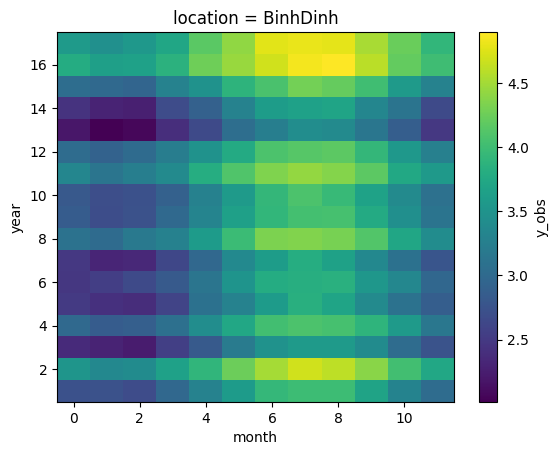

In [33]:
new_a_samples.posterior_predictive['y_obs'].sel(location='BinhDinh').median(dim=['chain', 'draw']).plot()

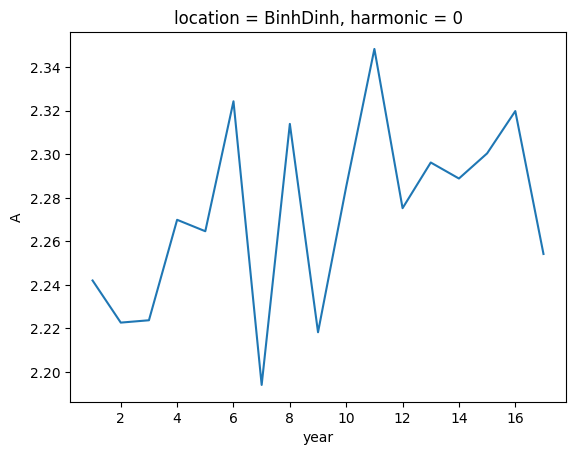

In [34]:
new_a_samples.posterior_predictive['A'].sel(harmonic=0, location='BinhDinh').mean(dim=['chain', 'draw']).plot()

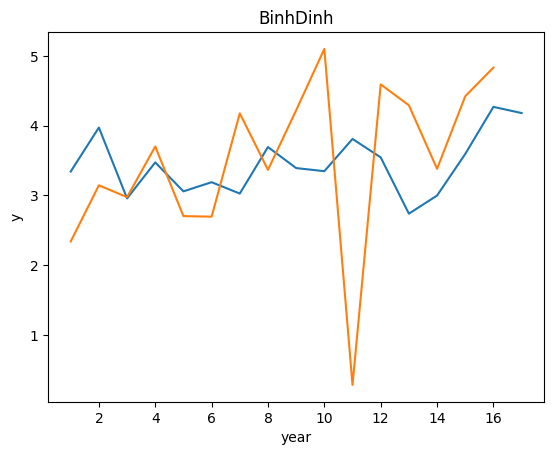

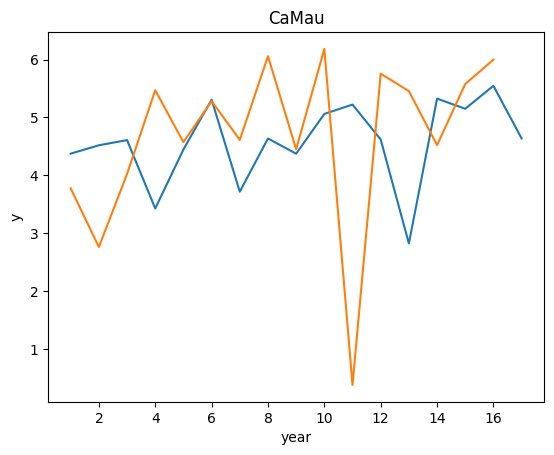

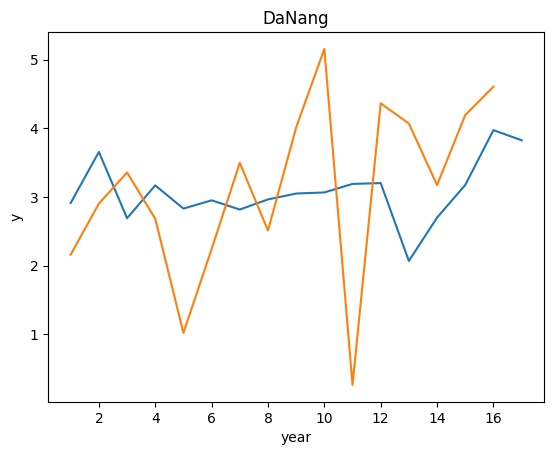

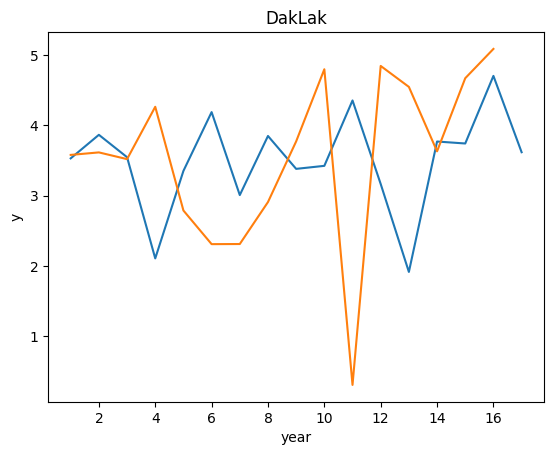

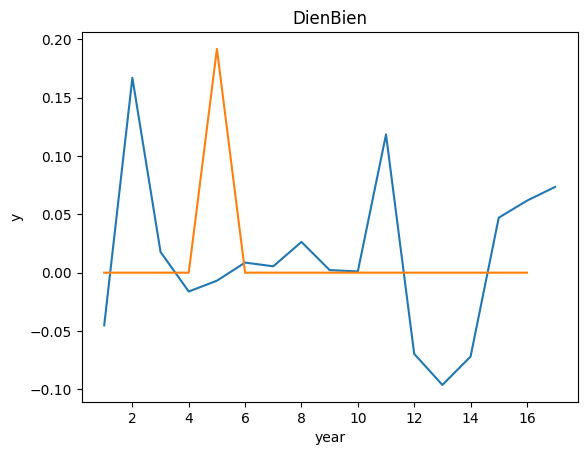

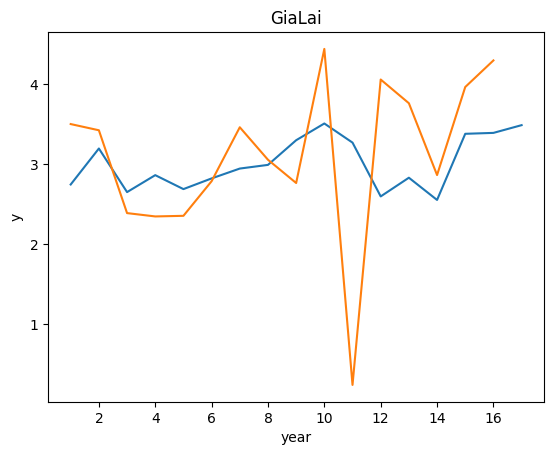

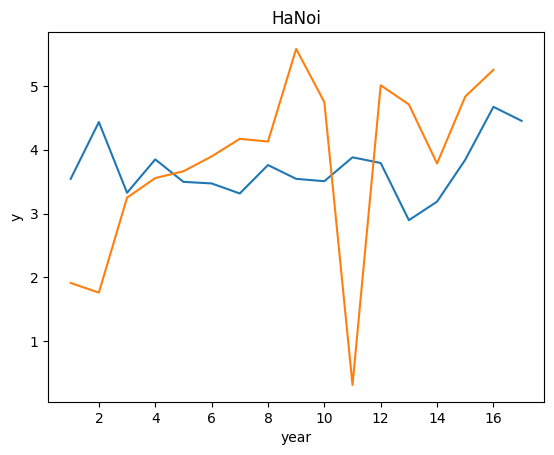

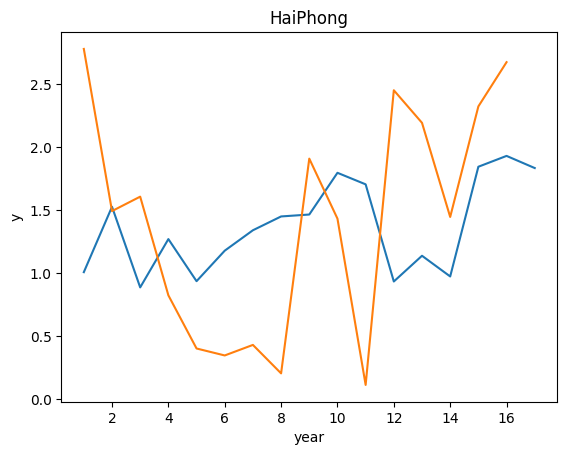

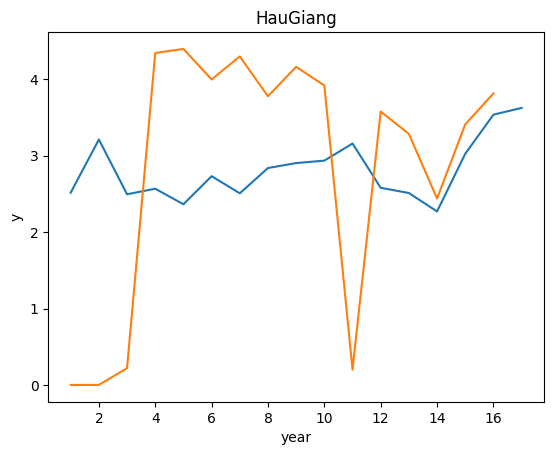

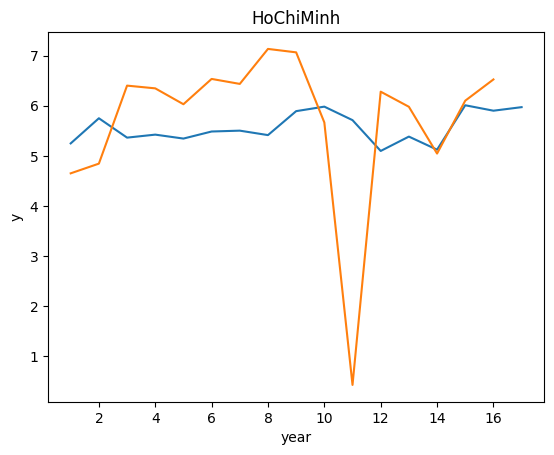

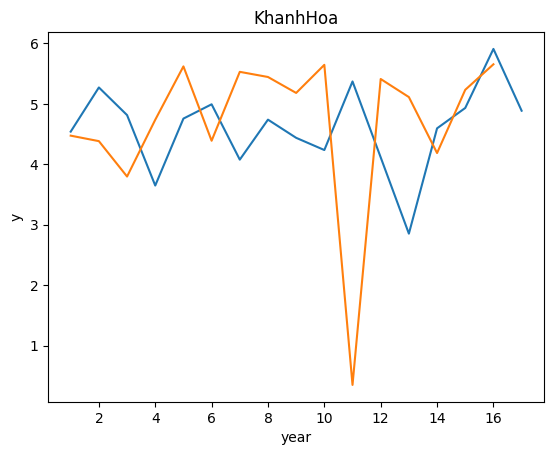

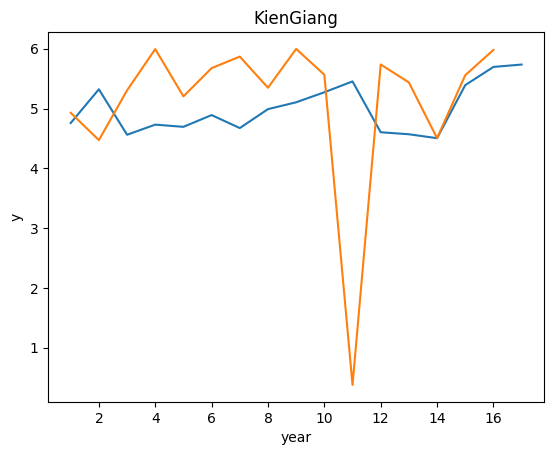

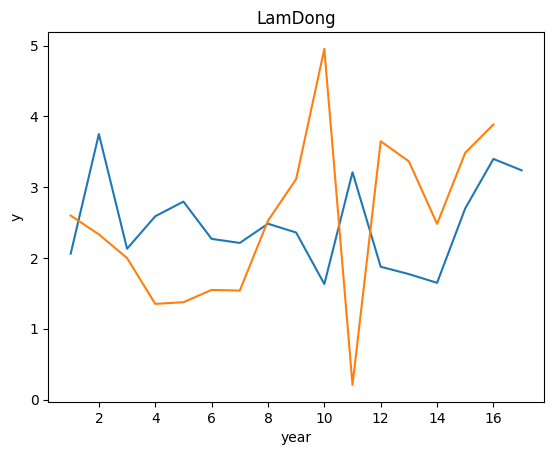

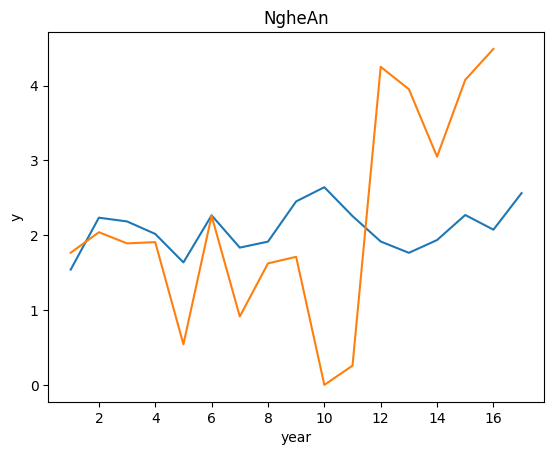

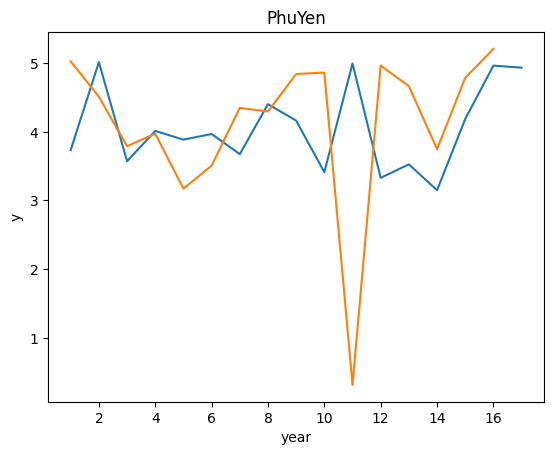

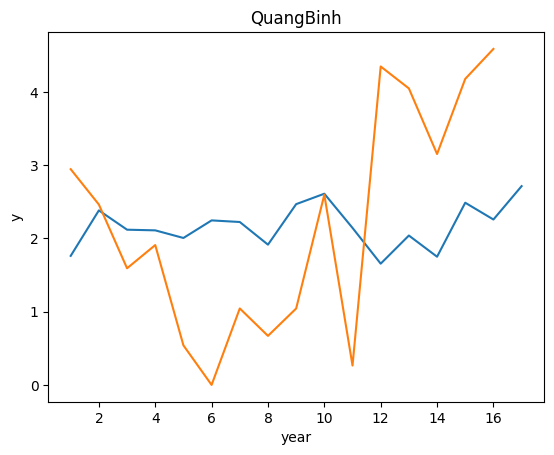

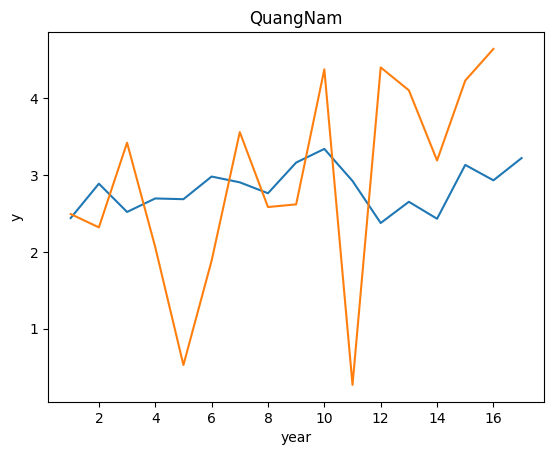

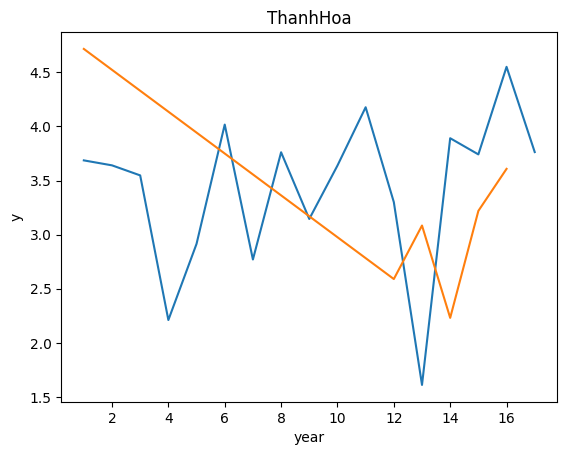

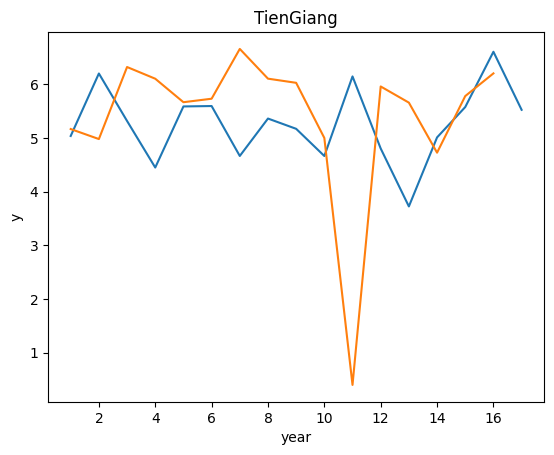

In [35]:
for location in y.location.values:
    plt.figure()
    new_a_samples.posterior_predictive['y_obs'].sel(location=location).mean(dim=['chain', 'draw', 'month']).plot()
    y.sel(location=location).mean(dim='month').plot()
    plt.title(location)